# Get graph data

This notebook allows you to download a graph on that you agents can walk around.

After running the Notebook a new `edges.geojson` is created in the directory of this project. This file you can use as input file for the simulation, for that copy it the Resources folder and prepare the `config.json` with the correct path nad define your Layer.

In [ ]:
!pip install osmnx

In [11]:
import os
import datetime as dt
from pathlib import Path

import matplotlib.pyplot as plt
import osmnx as ox
import shapely

In [12]:
# read in shape from WKT file, into an shape object we can use with OSMnx
# This .wkt file can be created with https://geojson.io/ , make sure that the filename matches
# the variable name below!
WKT_FILE = 'Port_Elizabeth.wkt'

with open(WKT_FILE) as f:
    wkt = f.read()
    
shape = shapely.wkt.loads(wkt)

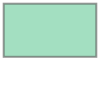

In [13]:
shape

In [14]:
# download graph from shape object (might take a few minutes)
G = ox.graph_from_polygon(
    shape,
    network_type='drive',
    simplify=True
)

In [15]:
# save graph nodes and edges to disk as GeoJSON
# no direct API in OSMNx but maintainer has provided the following
# snippet: https://github.com/gboeing/osmnx/issues/622
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_nodes = ox.io._stringify_nonnumeric_cols(gdf_nodes)
gdf_edges = ox.io._stringify_nonnumeric_cols(gdf_edges)

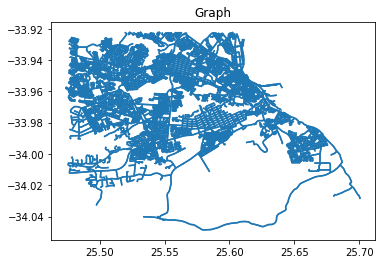

In [16]:
# Visualize the graph
gdf_edges.plot()
plt.title("Graph")
plt.show()

In [17]:
# Save graph into model
# Save to geojson file we can use in MARS
res = Path("./GeoVectorBlueprint/Resources")
res.mkdir(parents=True, exist_ok=True)

# if the file already exists make a backup
if (res / 'edges.geojson').is_file():
    now = dt.datetime.now()
    os.rename(res / 'edges.geojson', res / f'bkp_edges_{now.strftime("%Y%m%d_%H%M%S")}.geojson')

gdf_edges.to_file(res / 'edges.geojson', driver='GeoJSON')

# nodes are not need for simulation
#gdf_nodes.to_file('nodes.geojson', driver='GeoJSON') 